# XGBoost - Pipeline Condition Classification
## TASK 5: Baseline Model Evaluation

**Date:** December 30, 2025  
**Algorithm:** XGBoost Classifier  
**Target:** Condition (Normal / Moderate / Critical)  
**Problem Type:** Multi-class Classification

---
## Setup

In [3]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print('✓ Libraries loaded')
print(f'XGBoost version: {xgb.__version__}')

✓ Libraries loaded
XGBoost version: 3.1.2


---
## Load Data

In [4]:
# Load train/test splits
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

print('✓ Data loaded')
print(f'Training set: {X_train.shape[0]} samples, {X_train.shape[1]} features')
print(f'Test set: {X_test.shape[0]} samples')

✓ Data loaded
Training set: 800 samples, 24 features
Test set: 200 samples


---
## Train Model

In [5]:
# Initialize and train XGBoost
model = xgb.XGBClassifier(
    n_estimators=100,           # Number of boosting rounds
    max_depth=6,                # Maximum tree depth
    learning_rate=0.1,          # Step size shrinkage
    objective='multi:softprob', # Multi-class probability
    random_state=42,            # Reproducibility
    n_jobs=-1,                  # Use all CPU cores
    eval_metric='mlogloss'      # Multi-class log loss
)

print('Training XGBoost...')
model.fit(X_train, y_train)
print('✓ Model trained successfully')
print(f'Number of boosting rounds: {model.n_estimators}')

Training XGBoost...
✓ Model trained successfully
Number of boosting rounds: 100


---
## Make Predictions

In [6]:
# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Prediction probabilities
y_test_proba = model.predict_proba(X_test)

print('✓ Predictions completed')

✓ Predictions completed


---
## Evaluate Performance

In [7]:
# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('='*60)
print('XGBOOST - PERFORMANCE METRICS')
print('='*60)
print(f'\nTraining Accuracy:   {train_accuracy:.4f} ({train_accuracy*100:.2f}%)')
print(f'Test Accuracy:       {test_accuracy:.4f} ({test_accuracy*100:.2f}%)')
print(f'\nOverfitting Check:   {train_accuracy - test_accuracy:.4f}')
if train_accuracy - test_accuracy < 0.05:
    print('Status: ✓ Good generalization')
elif train_accuracy - test_accuracy < 0.10:
    print('Status: ⚠ Slight overfitting')
else:
    print('Status: ⚠ Overfitting detected')

XGBOOST - PERFORMANCE METRICS

Training Accuracy:   1.0000 (100.00%)
Test Accuracy:       0.9950 (99.50%)

Overfitting Check:   0.0050
Status: ✓ Good generalization


In [8]:
# Classification Report
print('\n' + '='*60)
print('CLASSIFICATION REPORT - TEST SET')
print('='*60)

# Load target mapping for class names
import json
try:
    with open('target_mapping.json', 'r') as f:
        target_mapping = json.load(f)
    class_names = [k for k, v in sorted(target_mapping.items(), key=lambda x: x[1])]
except:
    class_names = ['Class_0', 'Class_1', 'Class_2']

print(classification_report(y_test, y_test_pred, target_names=class_names))


CLASSIFICATION REPORT - TEST SET
              precision    recall  f1-score   support

     Class_0       1.00      1.00      1.00        97
     Class_1       0.98      1.00      0.99        60
     Class_2       1.00      0.98      0.99        43

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



---
## Confusion Matrix

✓ Saved: confusion_matrix_xgboost.png


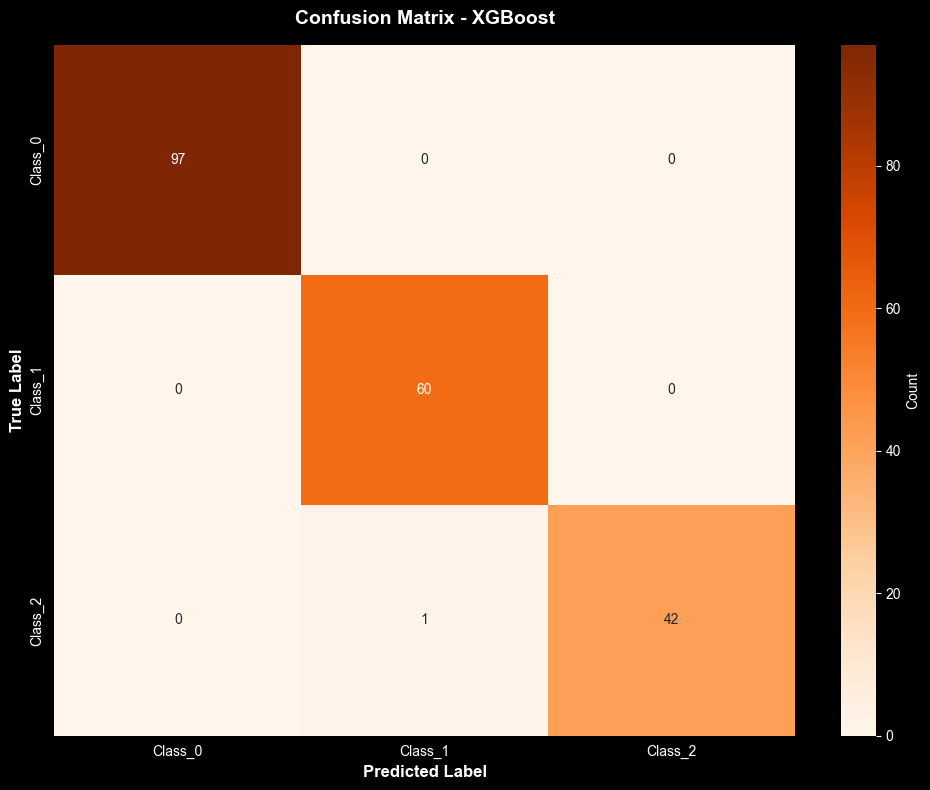

In [9]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - XGBoost', fontsize=14, fontweight='bold', pad=15)
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('confusion_matrix_xgboost.png', dpi=300, bbox_inches='tight')
print('✓ Saved: confusion_matrix_xgboost.png')
plt.show()

---
## Feature Importance

In [10]:
# Get feature importance (gain-based)
importance_dict = model.get_booster().get_score(importance_type='gain')

# Create DataFrame
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': [importance_dict.get(f'f{i}', 0) for i in range(len(X_train.columns))]
}).sort_values('Importance', ascending=False)

print('Feature Importance (Top 15):')
print('='*60)
print(feature_importance.head(15).to_string(index=False))

# Save full feature importance
feature_importance.to_csv('feature_importance_xgboost.csv', index=False)
print('\n✓ Saved: feature_importance_xgboost.csv')

Feature Importance (Top 15):
                    Feature  Importance
               Pipe_Size_mm           0
               Thickness_mm           0
                   Material           0
                      Grade           0
           Max_Pressure_psi           0
              Temperature_C           0
   Corrosion_Impact_Percent           0
          Thickness_Loss_mm           0
      Material_Loss_Percent           0
                 Time_Years           0
        Thickness_Loss_Rate           0
         Material_Loss_Rate           0
        Remaining_Thickness           0
       Thickness_Loss_Ratio           0
Pressure_to_Thickness_Ratio           0

✓ Saved: feature_importance_xgboost.csv


✓ Saved: feature_importance_plot_xgboost.png


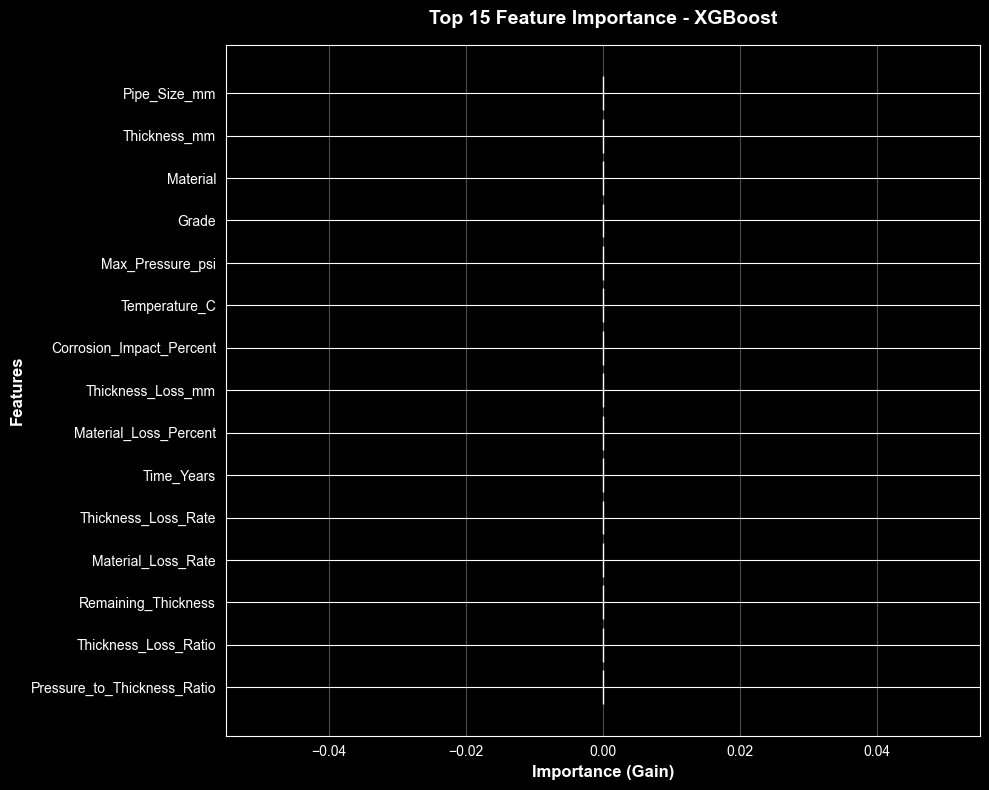

In [11]:
# Visualize top 15 features
top_features = feature_importance.head(15)

plt.figure(figsize=(10, 8))
colors = plt.cm.Oranges(np.linspace(0.4, 0.8, len(top_features)))
plt.barh(top_features['Feature'], top_features['Importance'], color=colors)
plt.xlabel('Importance (Gain)', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Top 15 Feature Importance - XGBoost', fontsize=14, fontweight='bold', pad=15)
plt.gca().invert_yaxis()
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('feature_importance_plot_xgboost.png', dpi=300, bbox_inches='tight')
print('✓ Saved: feature_importance_plot_xgboost.png')
plt.show()

---
## Model Information

In [12]:
# Display model parameters
print('XGBoost Configuration:')
print('='*60)
print(f'Number of estimators: {model.n_estimators}')
print(f'Max depth: {model.max_depth}')
print(f'Learning rate: {model.learning_rate}')
print(f'Objective: {model.objective}')
print(f'Evaluation metric: {model.eval_metric}')
print(f'Random state: {model.random_state}')
print(f'\nTotal features used: {model.n_features_in_}')
print(f'Classes: {model.classes_}')

XGBoost Configuration:
Number of estimators: 100
Max depth: 6
Learning rate: 0.1
Objective: multi:softprob
Evaluation metric: mlogloss
Random state: 42

Total features used: 24
Classes: [0 1 2]


---
## Save Results

In [13]:
# Save results
results = {
    'Model': 'XGBoost',
    'Training_Accuracy': round(train_accuracy, 4),
    'Test_Accuracy': round(test_accuracy, 4),
    'N_Estimators': model.n_estimators,
    'Max_Depth': model.max_depth,
    'Learning_Rate': model.learning_rate,
    'Features': X_train.shape[1],
    'Training_Samples': X_train.shape[0],
    'Test_Samples': X_test.shape[0]
}

results_df = pd.DataFrame([results])
results_df.to_csv('xgboost_results.csv', index=False)
print('✓ Saved: xgboost_results.csv')

# Save predictions
predictions_df = pd.DataFrame({
    'True_Label': y_test,
    'Predicted_Label': y_test_pred
})

# Add probability columns
for i, class_name in enumerate(class_names):
    predictions_df[f'Prob_{class_name}'] = y_test_proba[:, i]

predictions_df.to_csv('xgboost_predictions.csv', index=False)
print('✓ Saved: xgboost_predictions.csv')

✓ Saved: xgboost_results.csv
✓ Saved: xgboost_predictions.csv


---
## Summary

### Model: XGBoost Classifier
- **Algorithm:** Gradient Boosting (optimized)
- **Boosting rounds:** 100
- **Max depth:** 6
- **Learning rate:** 0.1
- **Scaling:** Not required (tree-based model)

### Performance:
- Check accuracy scores above
- Review classification report for per-class metrics
- Analyze confusion matrix for misclassifications

### Feature Importance:
- Based on gain (improvement in loss function)
- Higher values = more important features
- Different from Random Forest (uses frequency)

### Files Generated:
- confusion_matrix_xgboost.png
- feature_importance_plot_xgboost.png
- feature_importance_xgboost.csv
- xgboost_results.csv
- xgboost_predictions.csv

### Advantages:
- Usually best performance
- No feature scaling needed
- Fast training with optimized algorithm
- Handles imbalanced classes well
- Built-in regularization

### XGBoost vs Random Forest:
- XGBoost: Sequential boosting, corrects errors
- Random Forest: Parallel trees, averages predictions
- XGBoost typically achieves higher accuracy

---
**XGBoost Complete!**